<a href="https://colab.research.google.com/github/JayK327/Machine_Learning/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use Mall customers dataset from kaggle**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: Mall_Customers.csv      


In [3]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop("CustomerID",inplace=True,axis=1)

In [10]:
df.rename(
    columns={
        "Spending Score (1-100)":"SpendingScore",
        "Annual Income (k$)" : "AnnualIncome"
    },inplace=True
)

df.head()

,Genre,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
df["Genre"]=df["Genre"].replace({
      "Male":1,
      "Female":0
     })
df.head()

,Genre,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


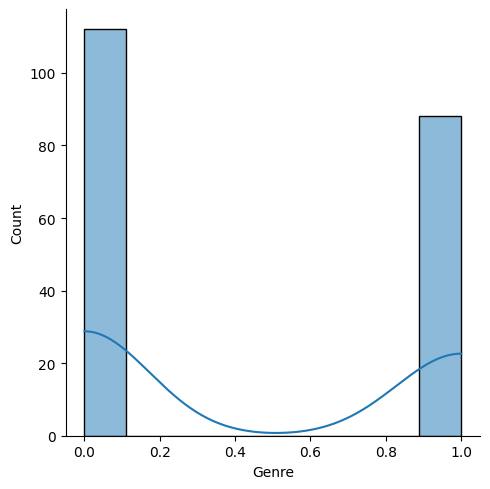

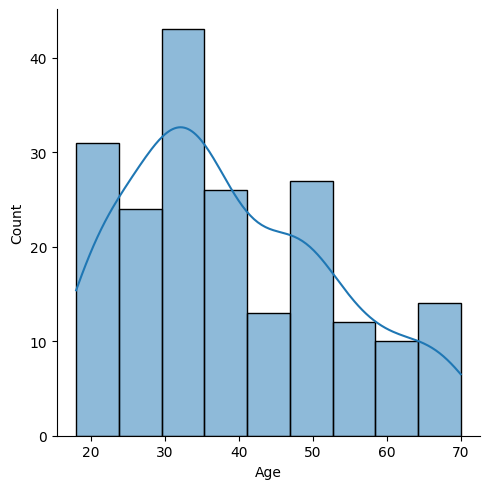

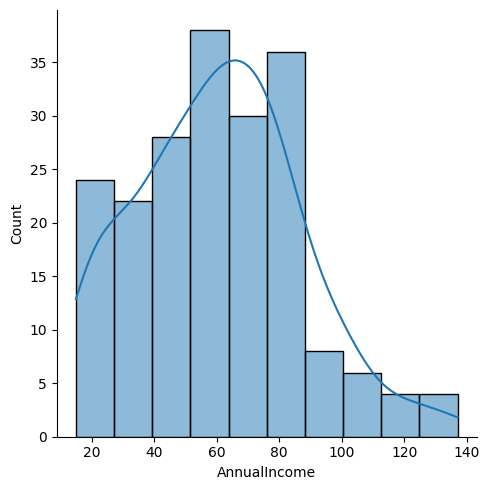

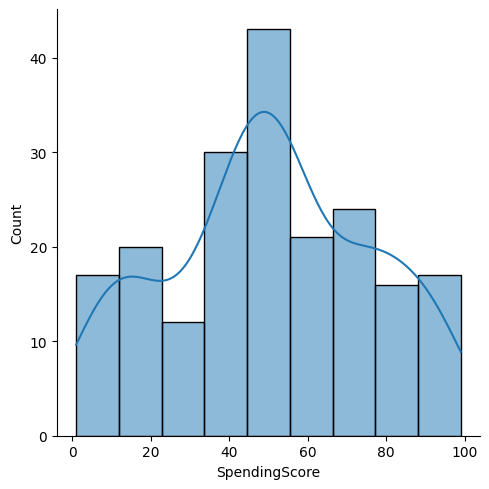

In [12]:
import seaborn as sns
for col in df.columns:
  sns.displot(df[col],kde=True)

In [13]:
from scipy.cluster.hierarchy import linkage
merg=linkage(df,method='single',metric='euclidean')

In [14]:
merg.shape

(199, 4)

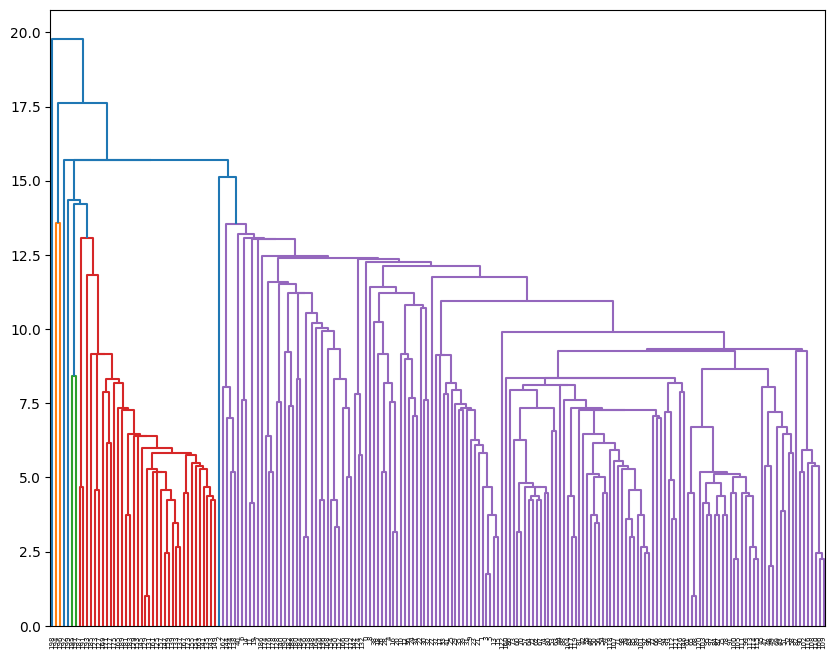

In [16]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,8))
dendrogram(merg)
plt.show()

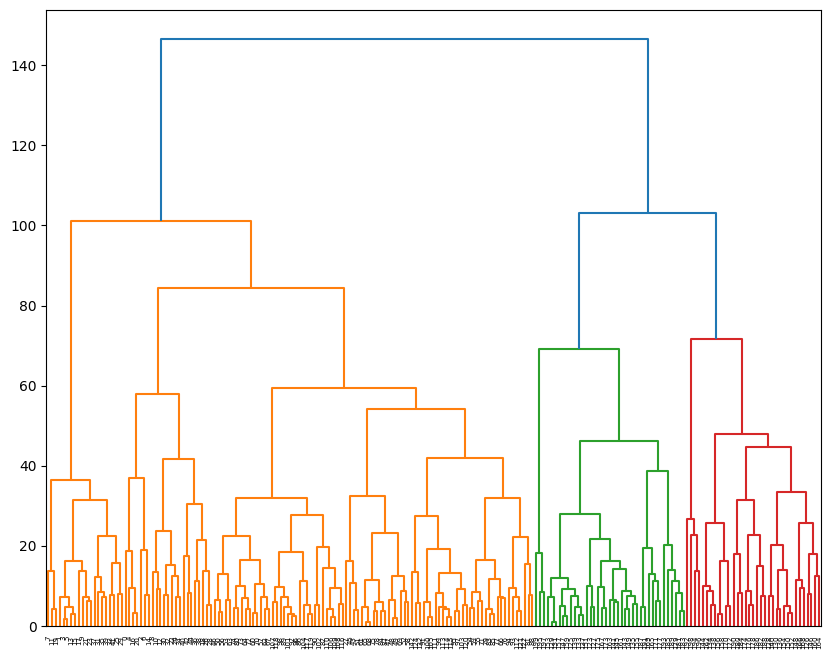

In [17]:
from scipy.cluster.hierarchy import linkage
merg=linkage(df,method='complete',metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(merg)
plt.show()

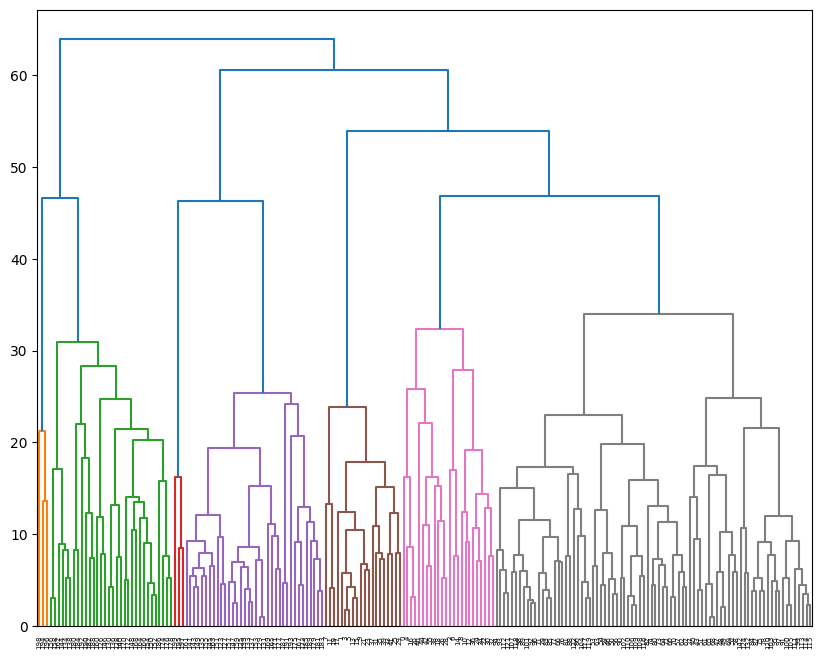

In [18]:
from scipy.cluster.hierarchy import linkage
merg=linkage(df,method='average',metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(merg)
plt.show()

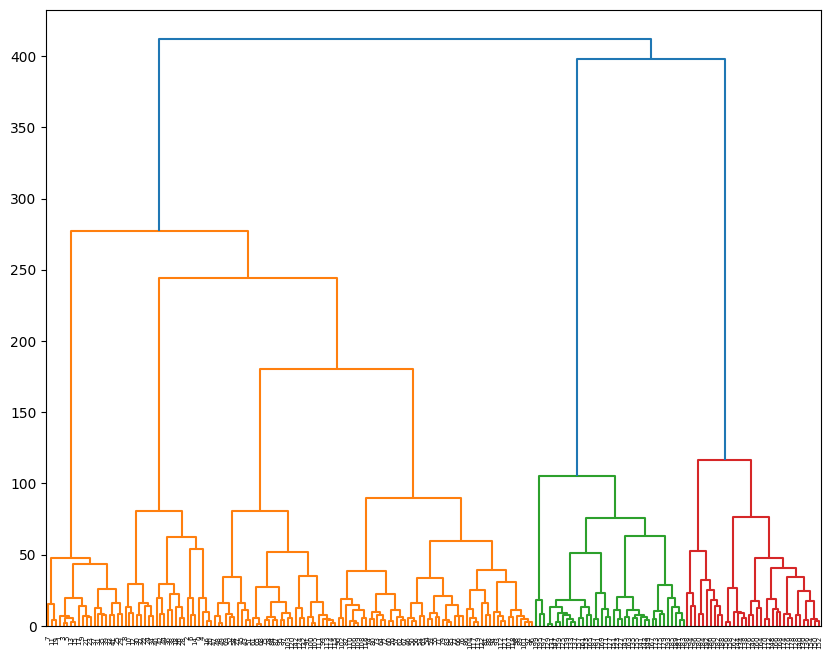

In [19]:
from scipy.cluster.hierarchy import linkage
merg=linkage(df,method='ward',metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(merg)
plt.show()

In [24]:
from scipy.cluster.hierarchy import cut_tree
y_pred =cut_tree(merg,n_clusters=5)

In [25]:
y_pred=y_pred.reshape(-1)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 4, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

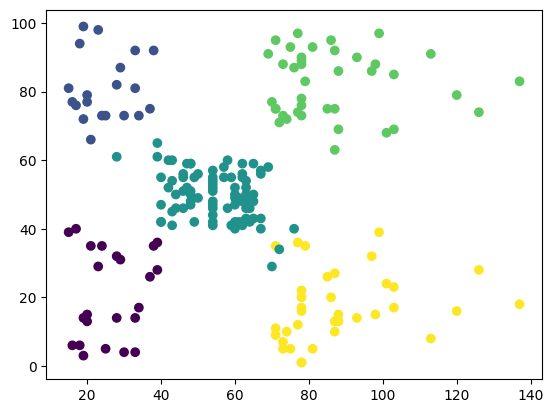

In [26]:
plt.scatter(df["AnnualIncome"],df["SpendingScore"],c=y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


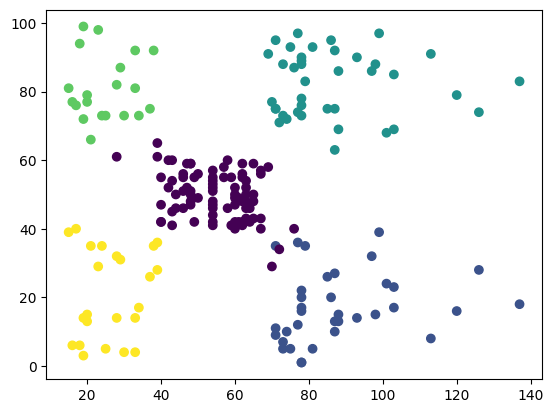

In [33]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred=agg.fit_predict(df)
plt.scatter(df["AnnualIncome"],df["SpendingScore"],c=y_pred)

In [35]:
import plotly.express as px
px.scatter_3d(df,x="Age",y="AnnualIncome",z="SpendingScore",color=y_pred)